<a href="https://colab.research.google.com/github/ialegre/SMA/blob/main/2023_08_21_SponsorhipOlympics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/2. Twitter_SponsorshipOlympics_Data.csv', encoding='latin1')

In [ ]:
df.head(10)

A. How many tweets mention Cartier? How many mention Rolex and how many mention Omega?


Rolex      5178
Cartier    3727
Omega      2859
Name: Brand, dtype: int64


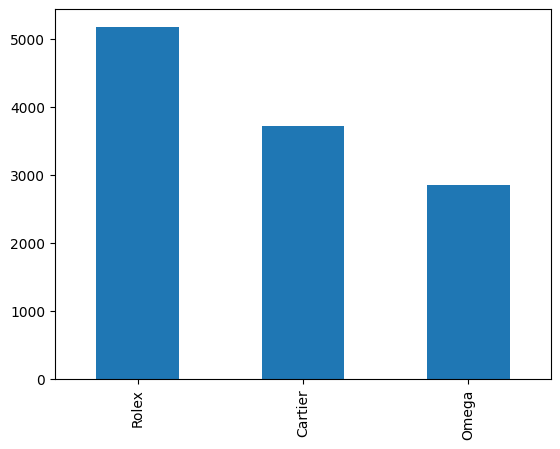

In [ ]:
brand_counts = df['Brand'].value_counts()
print(brand_counts)
brand_counts.plot(kind='bar')
plt.show()

Check duplicates

In [ ]:
duplicate_count = df.duplicated(subset=['status_id']).sum()
print(duplicate_count)
print(df[df.duplicated(subset=['status_id'])].head())
cartier_mentions = df['text'].str.lower().str.contains('cartier').sum()
omega_mentions = df['text'].str.lower().str.contains('omega').sum()
rolex_mentions = df['text'].str.lower().str.contains('rolex').sum()
print(cartier_mentions)
print(omega_mentions)
print(rolex_mentions)

1508
      Unnamed: 0              user_id            status_id  \
1101        1102            446009561  1417075119734722563   
1102        1103           2553331622  1417067032730873862   
1103        1104           2553331622  1417064941702598657   
1106        1107   777134749424820224  1417037988501016578   
1107        1108  1373545271389458432  1417032423334940676   

               created_at    screen_name  \
1101  2021-07-19 10:53:31   Spmcgrath123   
1102  2021-07-19 10:21:23     MSDEHKHODA   
1103  2021-07-19 10:13:04     MSDEHKHODA   
1106  2021-07-19 08:25:58  WildmanPammer   
1107  2021-07-19 08:03:51  Johnm55421112   

                                                   text               source  \
1101  My Internal inertia is too Great to let extern...   Twitter for iPhone   
1102  @C4mi13 @srihariravi12 @ROLEX Rafans when they...   Twitter for iPhone   
1103  @C4mi13 @srihariravi12 One of many double matc...   Twitter for iPhone   
1106  @garyevanspro @euLegendsTour @R

B. Do we see a change on the amount of Omega tweets with respect to Rolex and Cartier?

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.strftime('%m-%d')
brand_date_counts = df.groupby(['Brand', 'date']).size().unstack(fill_value=0)
brand_date_counts.plot(kind='line', y='Cartier', color='blue')
brand_date_counts.plot(kind='line', y='Rolex', color='red')
brand_date_counts.plot(kind='line', y='Omega', color='green')
plt.show()

KeyError: ignored

Detail of Cartier

In [ ]:
cartier = df[df['Brand'] == 'Cartier']
cartier_tail = cartier[cartier['date'] == '07-04'].tail(10)
print(cartier_tail)
cartier_mean_mentions = cartier[cartier['date'] == '07-04']['text'].str.contains('@Bangtan_Style07').mean()
print(cartier_mean_mentions)

      Unnamed: 0              user_id            status_id  \
8292       31171            202832040  1411528473471066119   
8294       31191            118990336  1411535538180419589   
8295       31201            118990336  1411536357982277635   
8296       31211   942617876116262912  1411533552471117825   
8300       31251  1406396863520071683  1411519422603223042   
8301       31261           2147806867  1411511411264692230   
8302       31271            165456141  1411506597206056963   
8303       31281             57640635  1411506587995234307   
8304       31291  1398143887617576966  1411495559383248899   
8305       31301             19622952  1411485849137549312   

              created_at     screen_name  \
8292 2021-07-04 03:33:07   MagdaRomanska   
8294 2021-07-04 04:01:12   jeremyoharris   
8295 2021-07-04 04:04:27   jeremyoharris   
8296 2021-07-04 03:53:18   Jigglypuff004   
8300 2021-07-04 02:57:09   Marna03517387   
8301 2021-07-04 02:25:19     Hi_ItsMeMel   
8302 2021

C. Explore the database. What other insights can be obtained?

C1. Which countries are tweeting

In [ ]:
country_counts = df['country_code'].value_counts(dropna=False)
print(country_counts)

C2. Which device/source is most used for tweets

In [ ]:
source_counts = df['source'].value_counts()
print(source_counts.head())

C3. Language

In [ ]:
lang_counts = df['lang'].value_counts()
print(lang_counts)

C4. Source

In [ ]:
top_sources = df['source'].value_counts().head(10)
print(top_sources)
source_brand_counts = df.groupby(['source', 'Brand']).size().unstack(fill_value=0)
print(source_brand_counts)

C5. Author

In [ ]:
top_user_ids = df['user_id'].value_counts().head(10)
top_screen_names = df['screen_name'].value_counts().head(10)
omega_screen_names = df[df['Brand'] == 'Omega']['screen_name'].value_counts().head(10)
cartier_screen_names = df[df['Brand'] == 'Cartier']['screen_name'].value_counts().head(10)
rolex_screen_names = df[df['Brand'] == 'Rolex']['screen_name'].value_counts().head(10)
print(top_user_ids)
print(top_screen_names)
print(omega_screen_names)
print(cartier_screen_names)
print(rolex_screen_names)
